In [82]:
import pandas as pd

df = pd.read_csv("credit_card_customer_data.csv")
df.head()


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [83]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [84]:
df.duplicated().sum()

0

In [85]:
df.drop(columns="Sl_No" , inplace=True)

In [86]:
df["Customer Key"].value_counts()

Customer Key
97935    2
50706    2
47437    2
37252    2
96929    2
        ..
73811    1
72892    1
51773    1
96163    1
80150    1
Name: count, Length: 655, dtype: int64

In [87]:
df.drop(columns = ["Customer Key"] , inplace=True)

### Search for the optimal number of clusters using elbow method and silhoutte score.

In [88]:
#Scaling dataframe
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [89]:
#Building lists with scores for graphs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

max_value=15
wcss=[]
shil_score=[]

for k in range(2,max_value):
    kmeans = KMeans(n_clusters=k , init='k-means++' ,random_state=42)
    model = kmeans.fit(df_scaled)
    model_predict = model.predict(df_scaled)
    
    wcss.append(model.inertia_)
    shil_score.append(silhouette_score(df_scaled, model_predict))

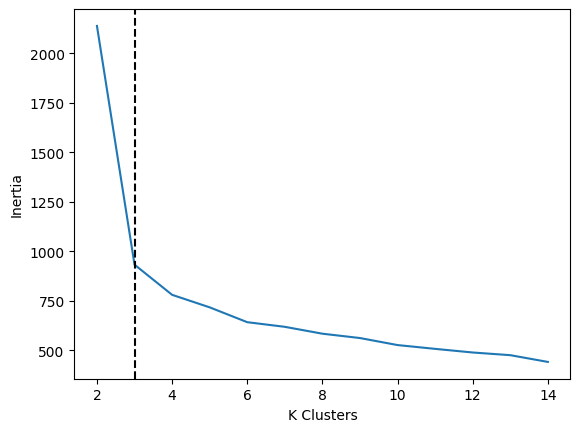

In [90]:
import matplotlib.pyplot as plt

plt.ylabel("Inertia")
plt.xlabel("K Clusters")
plt.plot(range(2,max_value) , wcss)
plt.axvline(3.0,linestyle='--',color='k')


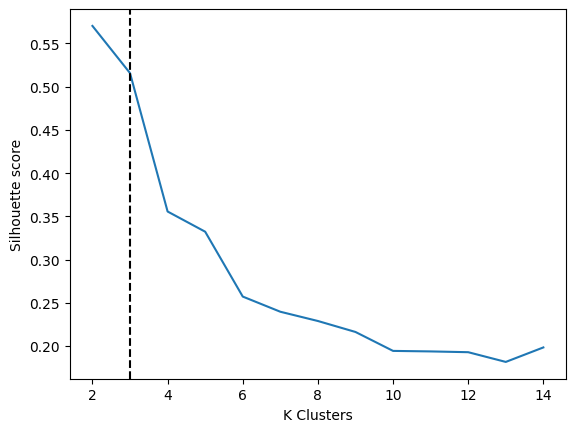

In [91]:
plt.ylabel("Silhouette score")
plt.xlabel("K Clusters")
plt.plot(range(2,max_value) , shil_score)
plt.axvline(3.0,linestyle='--',color='k')

K = 3 is the optimal number of clusters

In [92]:
#Train with K=3 and add labels to the dataframe
kmeans = KMeans(n_clusters=3 , init='k-means++' ,random_state=42)
model = kmeans.fit_predict(df_scaled)
df["label"] = model

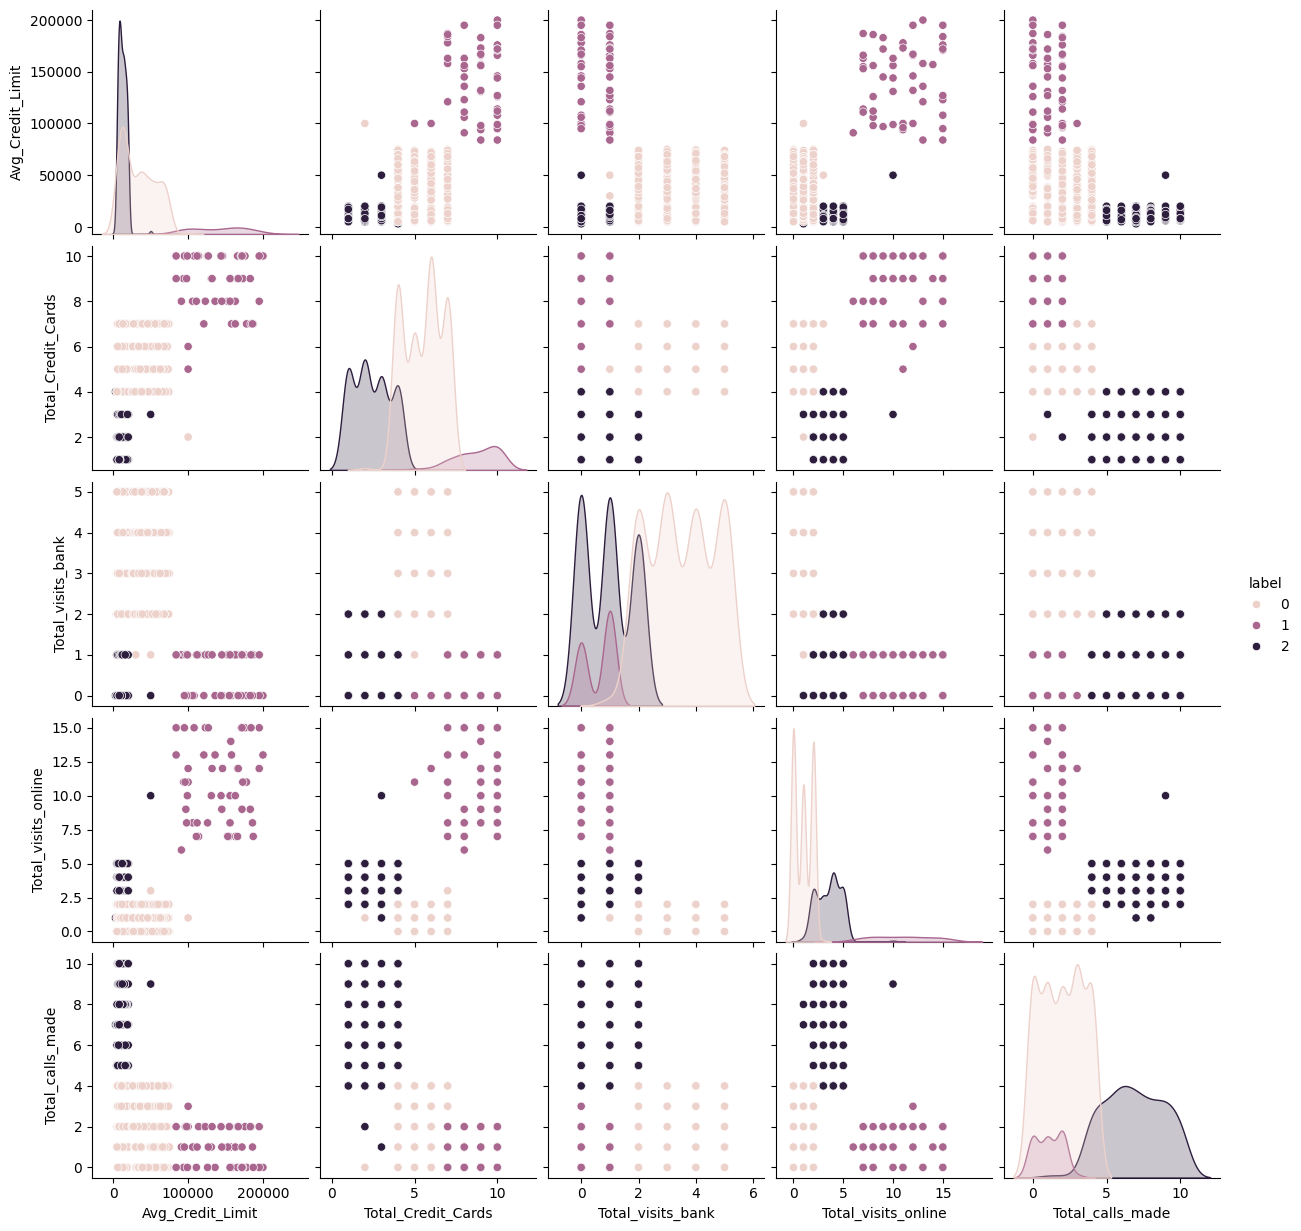

In [93]:
import seaborn as sns

sns.pairplot(df , hue="label")

In [94]:
import pickle 

pickle.dump(model , open("model.pkl" , "wb"))
